In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/ProjetML/train_Insurance.csv',sep=",")
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/ProjetML/test_Insurance.csv',sep=",")
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [ ]:
df_train.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 

In [ ]:
df_train.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [ ]:
df_test.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,2147,2147.000000,2147.000000,2147.000000,2147,2147,2144,2147,2118.000000,2147,2147,2118,2147
unique,2147,NaN,NaN,NaN,2,2,2,2,NaN,4,11,714,2
top,H3733,NaN,NaN,NaN,V,V,V,U,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,1619,1074,1074,1074,NaN,995,1074,41,1639
mean,NaN,2013.691197,0.876805,0.315789,NaN,NaN,NaN,NaN,1899.700189,NaN,NaN,NaN,NaN
std,NaN,1.385631,0.215504,0.464938,NaN,NaN,NaN,NaN,2304.300053,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,535.500000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1100.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2300.000000,NaN,NaN,NaN,NaN


In [ ]:
#number of duplicated lines -> since there are no duplicates lines no need to delete lines
df_train.duplicated().sum()

0

In [ ]:
#Insured_Period
df_train["Insured_Period"].unique()
# -> no outliers
# no further treatment needed

array([1. , 0.5])

In [ ]:
#Residential
df_train["Residential"].unique()
# -> no outliers
# no further treatment needed

array([1, 0])

In [ ]:
#Building Painted
df_train["Building_Painted"].unique()

array(['N', 'V'], dtype=object)

In [ ]:
def BuildingPainted(df):
  enc1 = OrdinalEncoder(categories=[['V','N']])
  df[["Building_Painted"]] = enc1.fit_transform(df[["Building_Painted"]])
  return df

df_train = BuildingPainted(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,1.0,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,0.0,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,1.0,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,1.0,V,V,U,900.0,Non-combustible,without,57631,non


In [ ]:
#Building_Fenced
df_train["Building_Fenced"].unique()

array(['V', 'N'], dtype=object)

In [ ]:
def BuildingFenced(df):
    enc1 = OrdinalEncoder(categories=[['V', 'N']])
    df[["Building_Fenced"]] = enc1.fit_transform(df[["Building_Fenced"]])
    return df
df_train = BuildingFenced(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,1.0,0.0,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,0.0,1.0,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,V,U,900.0,Non-combustible,without,57631,non


In [ ]:
#Garden
df_train["Garden"].unique()
#ther are 4 missing values -> delete rows with missing values for garden
df_train.dropna(subset=["Garden"], axis=0, inplace=True)
df_train = df_train.reset_index(drop=True)

In [ ]:
def Garden(df):
    enc1 = OrdinalEncoder(categories=[['O','V']])
    df[["Garden"]] = enc1.fit_transform(df[["Garden"]])
    return df
df_train = Garden(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,1.0,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,1.0,0.0,1.0,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,0.0,1.0,0.0,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,1.0,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,1.0,U,900.0,Non-combustible,without,57631,non


In [ ]:
#Settlement
df_train["Settlement"].unique()

array(['U', 'R'], dtype=object)

In [ ]:
def Settlement(df):
    enc1 = OrdinalEncoder(categories=[['R','U']])
    df[["Settlement"]] = enc1.fit_transform(df[["Settlement"]])
    return df
df_train = Settlement(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,1.0,1.0,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,0.0,1.0,0.0,0.0,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,1.0,1.0,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,Non-combustible,without,57631,non


In [ ]:
#Building_Type
df_train["Building_Type"].unique()

array(['Wood-framed', 'Non-combustible', 'Ordinary', 'Fire-resistive'],
      dtype=object)

In [ ]:
def Building_Type(df):
    enc3 = OrdinalEncoder(categories=[['Wood-framed', 'Ordinary', 'Non-combustible', 'Fire-resistive']])
    df[["Building_Type"]] = enc3.fit_transform(df[["Building_Type"]])
    return df
df_train = Building_Type(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,1.0,1.0,1240.0,0.0,without,75117,non
1,H14962,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,without,62916,non
2,H17755,2013,1.0,1,0.0,1.0,0.0,0.0,4984.0,2.0,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,1.0,1.0,600.0,0.0,without,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,without,57631,non


In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5008 non-null   object 
 1   YearOfObservation   5008 non-null   int64  
 2   Insured_Period      5008 non-null   float64
 3   Residential         5008 non-null   int64  
 4   Building_Painted    5008 non-null   float64
 5   Building_Fenced     5008 non-null   float64
 6   Garden              5008 non-null   float64
 7   Settlement          5008 non-null   float64
 8   Building Dimension  4931 non-null   float64
 9   Building_Type       5008 non-null   float64
 10  NumberOfWindows     5008 non-null   object 
 11  Geo_Code            4935 non-null   object 
 12  Claim               5008 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 508.8+ KB


In [ ]:
df_train["NumberOfWindows"].unique()

array(['without', '4', '2', '7', '5', '3', '8', '>=10', '6', '1', '9'],
      dtype=object)

In [ ]:
def changeNumberOfWindowsFormat(df):
    df['NumberOfWindows']=np.where(df['NumberOfWindows']=='without',0,
                                     np.where(df['NumberOfWindows']=='>=10',10,
                                              df['NumberOfWindows']))
    df['NumberOfWindows']=df['NumberOfWindows'].astype(int)
    return df
df_train = changeNumberOfWindowsFormat(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,1.0,1.0,1240.0,0.0,0,75117,non
1,H14962,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,0,62916,non
2,H17755,2013,1.0,1,0.0,1.0,0.0,0.0,4984.0,2.0,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,1.0,1.0,600.0,0.0,0,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,0,57631,non


In [ ]:
df_train["NumberOfWindows"].unique()


array([ 0,  4,  2,  7,  5,  3,  8, 10,  6,  1,  9])

<Axes: xlabel='Building Dimension', ylabel='Density'>

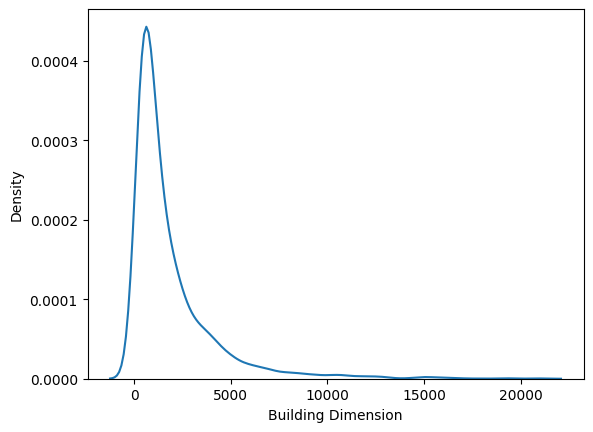

In [ ]:
#Building Dimension -> asymetrique
sns.kdeplot(df_train['Building Dimension'],
 bw_method='scott' ,bw_adjust=1)


In [ ]:
def removeNanInBuildingDimension(df):
    mf_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    arr=mf_imputer.fit_transform(df.loc[:,['Building Dimension']])
    imputed_df = pd.DataFrame(arr, columns=['Building Dimension'])
    df['Building Dimension'] = imputed_df['Building Dimension']
    #df.dropna(subset=["Building Dimension"], axis=0, inplace=True)
    #df = df.reset_index(drop=True)
    return df
df_train = removeNanInBuildingDimension(df_train)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,1.0,1.0,1240.0,0.0,0,75117,non
1,H14962,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,0,62916,non
2,H17755,2013,1.0,1,0.0,1.0,0.0,0.0,4984.0,2.0,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,1.0,1.0,600.0,0.0,0,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,0,57631,non


In [ ]:
df_train.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5008,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,4935,5008
unique,5008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115,2
top,H13501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6088,non
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,3883
mean,NaN,2013.660543,0.869609,0.301318,0.249401,0.505391,0.494409,0.494209,1863.706270,1.812500,2.202676,NaN,NaN
std,NaN,1.383584,0.219553,0.458876,0.432709,0.500021,0.500019,0.500016,2251.719995,0.942838,2.535834,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,530.000000,1.000000,0.000000,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1067.000000,2.000000,1.000000,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2250.000000,2.000000,4.000000,NaN,NaN


<Axes: xlabel='Building Dimension', ylabel='Density'>

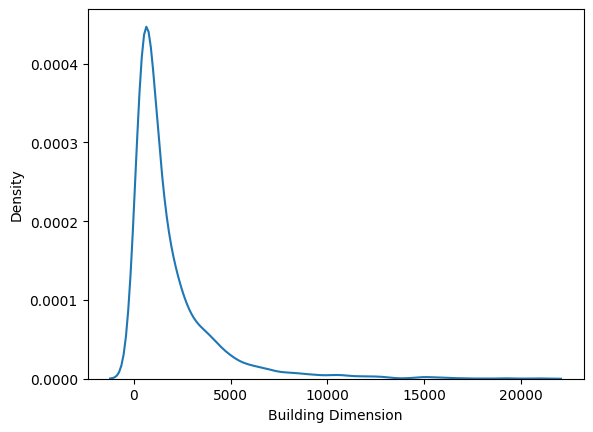

In [ ]:
sns.kdeplot(df_train['Building Dimension'],
 bw_method='scott' ,bw_adjust=1)

In [ ]:
#distribution asymetrique positive
# Equal-Frequency Discretization 'quantile'
def BuildingDimension(df):
    enc = KBinsDiscretizer(n_bins=150, encode='ordinal',
    strategy='quantile', subsample=len(df_train))
    df['Building Dimension'] = enc.fit_transform(df[['Building Dimension']])
    return df
df_train = BuildingDimension(df_train)
df_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,1.0,0.0,1.0,1.0,69.0,0.0,0,75117,non
1,H14962,2012,1.0,0,1.0,0.0,1.0,1.0,55.0,2.0,0,62916,non
2,H17755,2013,1.0,1,0.0,1.0,0.0,0.0,124.0,2.0,4,31149,oui
3,H13369,2016,0.5,0,1.0,0.0,1.0,1.0,36.0,0.0,0,6012,oui
4,H12988,2012,1.0,0,1.0,0.0,1.0,1.0,55.0,2.0,0,57631,non


<Axes: xlabel='Building Dimension', ylabel='Count'>

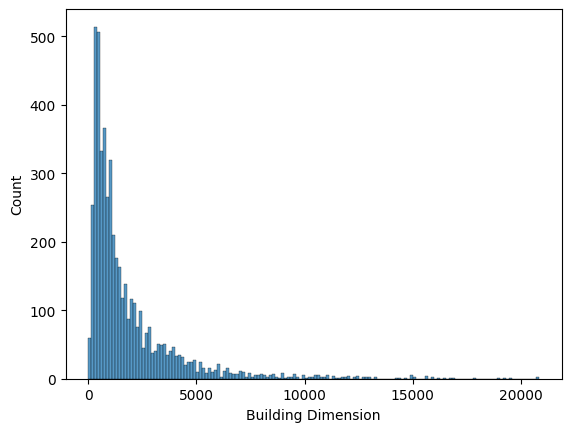

In [ ]:
sns.histplot(x="Building Dimension", data=df_train,
bins=150)

<Axes: xlabel='Geo_Code', ylabel='count'>

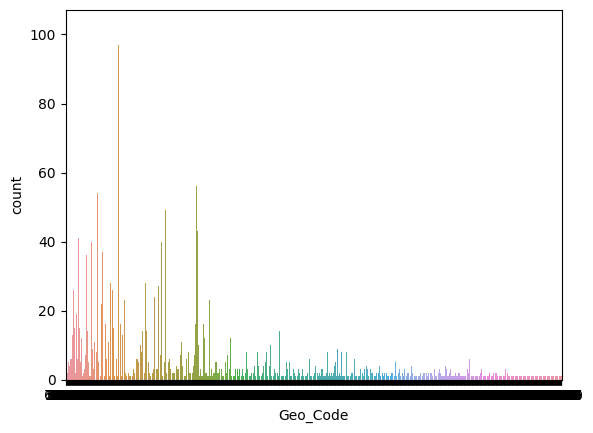

In [ ]:
sns.countplot(x="Geo_Code", data=df_train)

In [ ]:
def removeColumns(df):
    df = df.drop(columns=['Customer Id', 'YearOfObservation', 'Geo_Code'])
    return df
df_train = removeColumns(df_train)
df_train.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,1.0,1,1.0,0.0,1.0,1.0,1240.0,0.0,0,non
1,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,0,non
2,1.0,1,0.0,1.0,0.0,0.0,4984.0,2.0,4,oui
3,0.5,0,1.0,0.0,1.0,1.0,600.0,0.0,0,oui
4,1.0,0,1.0,0.0,1.0,1.0,900.0,2.0,0,non


In [ ]:
print(df_train.duplicated().sum())
df_train.drop_duplicates(inplace=True,ignore_index=True)
df_train.head()
df_test["Garden"].unique()

0


array(['V', 'O', nan], dtype=object)

In [ ]:
#test data
df_test = BuildingPainted(df_test)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,0.0,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,0.0,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,1.0,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,0.0,N,O,R,2976.0,Fire-resistive,9,5177,non


In [ ]:
df_test = BuildingFenced(df_test)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,0.0,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,0.0,1.0,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,0.0,1.0,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,1.0,0.0,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,0.0,1.0,O,R,2976.0,Fire-resistive,9,5177,non


In [ ]:
df_test.dropna(subset=["Garden"], axis=0, inplace=True)
df_test = df_test.reset_index(drop=True)
df_test["Garden"].unique()

array(['V', 'O'], dtype=object)

In [ ]:
df_test = Garden(df_test)

In [ ]:
df_test = Settlement(df_test)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,0.0,1.0,1.0,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,0.0,1.0,0.0,0.0,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,0.0,1.0,0.0,0.0,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,1.0,0.0,1.0,1.0,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,0.0,1.0,0.0,0.0,2976.0,Fire-resistive,9,5177,non


In [ ]:
df_test = Building_Type(df_test)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,0.0,1.0,1.0,3760.0,3.0,without,43157,oui
1,H16909,2015,1.0,0,0.0,1.0,0.0,0.0,1452.0,3.0,5,58194,non
2,H16867,2013,1.0,1,0.0,1.0,0.0,0.0,1944.0,1.0,6,92050,oui
3,H14813,2015,1.0,0,1.0,0.0,1.0,1.0,2270.0,2.0,without,13209,oui
4,H3728,2016,0.5,0,0.0,1.0,0.0,0.0,2976.0,3.0,9,5177,non


In [ ]:
df_test = changeNumberOfWindowsFormat(df_test)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,0.0,1.0,1.0,3760.0,3.0,0,43157,oui
1,H16909,2015,1.0,0,0.0,1.0,0.0,0.0,1452.0,3.0,5,58194,non
2,H16867,2013,1.0,1,0.0,1.0,0.0,0.0,1944.0,1.0,6,92050,oui
3,H14813,2015,1.0,0,1.0,0.0,1.0,1.0,2270.0,2.0,0,13209,oui
4,H3728,2016,0.5,0,0.0,1.0,0.0,0.0,2976.0,3.0,9,5177,non


In [ ]:
df_test = removeNanInBuildingDimension(df_test)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,0.0,1.0,1.0,3760.0,3.0,0,43157,oui
1,H16909,2015,1.0,0,0.0,1.0,0.0,0.0,1452.0,3.0,5,58194,non
2,H16867,2013,1.0,1,0.0,1.0,0.0,0.0,1944.0,1.0,6,92050,oui
3,H14813,2015,1.0,0,1.0,0.0,1.0,1.0,2270.0,2.0,0,13209,oui
4,H3728,2016,0.5,0,0.0,1.0,0.0,0.0,2976.0,3.0,9,5177,non


In [ ]:
df_test = BuildingDimension(df_test)
df_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,0.0,0.0,1.0,1.0,118.0,3.0,0,43157,oui
1,H16909,2015,1.0,0,0.0,1.0,0.0,0.0,78.0,3.0,5,58194,non
2,H16867,2013,1.0,1,0.0,1.0,0.0,0.0,91.0,1.0,6,92050,oui
3,H14813,2015,1.0,0,1.0,0.0,1.0,1.0,99.0,2.0,0,13209,oui
4,H3728,2016,0.5,0,0.0,1.0,0.0,0.0,108.0,3.0,9,5177,non


In [ ]:
df_test = removeColumns(df_test)
df_test.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,1.0,0,0.0,0.0,1.0,1.0,3760.0,3.0,0,oui
1,1.0,0,0.0,1.0,0.0,0.0,1452.0,3.0,5,non
2,1.0,1,0.0,1.0,0.0,0.0,1944.0,1.0,6,oui
3,1.0,0,1.0,0.0,1.0,1.0,2270.0,2.0,0,oui
4,0.5,0,0.0,1.0,0.0,0.0,2976.0,3.0,9,non


In [ ]:
X_train = df_train.iloc[:, :-1].values
Y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values

In [ ]:
cls = DecisionTreeClassifier()
cls.fit(X_train, Y_train)

DecisionTreeClassifier()

0.9413901671106806


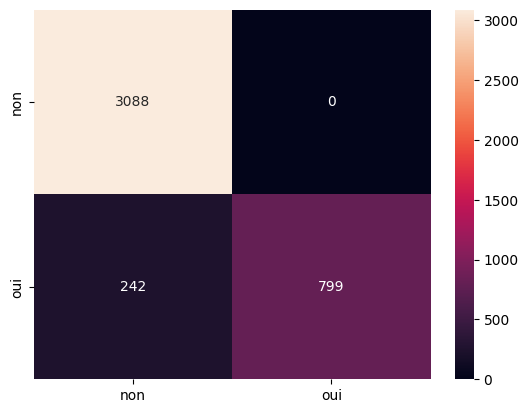

In [ ]:
Y_p_train1=cls.predict(X_train)
c_m_train=confusion_matrix(Y_train, Y_p_train1)
sns.heatmap(c_m_train, annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])
print(accuracy_score(Y_train,Y_p_train1))

0.7112873134328358


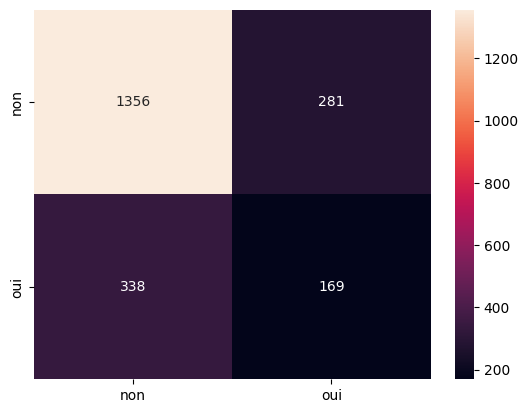

In [ ]:
Y_p_test1=cls.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,Y_p_test1), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])
print(accuracy_score(Y_test,Y_p_test1))

In [ ]:
#Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, Y_train)
Y_p_train2 = model_lr.predict(X_train)
Y_p_test2 = model_lr.predict(X_test)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

         non       0.77      0.98      0.86      3088
         oui       0.61      0.11      0.19      1041

    accuracy                           0.76      4129
   macro avg       0.69      0.54      0.52      4129
weighted avg       0.73      0.76      0.69      4129



<Axes: >

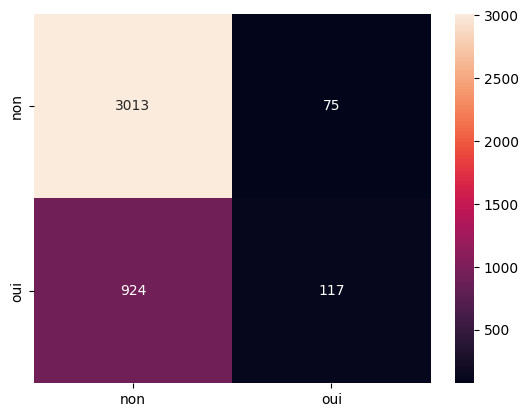

In [ ]:
#The train set
accuracy1 = accuracy_score(Y_train, Y_p_train2)
report1 = classification_report(Y_train, Y_p_train2)
# Print the results
print(f"Accuracy: {accuracy1:.2f}")
print("Classification Report:\n", report1)
sns.heatmap(confusion_matrix(Y_train,Y_p_train2), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

         non       0.78      0.98      0.87      1637
         oui       0.67      0.11      0.20       507

    accuracy                           0.78      2144
   macro avg       0.72      0.55      0.53      2144
weighted avg       0.75      0.78      0.71      2144



<Axes: >

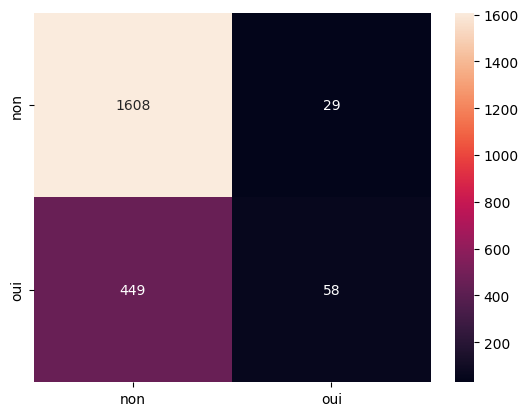

In [ ]:
#The test set
accuracy2 = accuracy_score(Y_test, Y_p_test2)
report2 = classification_report(Y_test, Y_p_test2)

# Print the results
print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:\n", report2)
sns.heatmap(confusion_matrix(Y_test,Y_p_test2), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])

In [ ]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Random Forest Classifier:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         non       0.94      0.98      0.96      3088
         oui       0.93      0.83      0.88      1041

    accuracy                           0.94      4129
   macro avg       0.94      0.90      0.92      4129
weighted avg       0.94      0.94      0.94      4129



<Axes: >

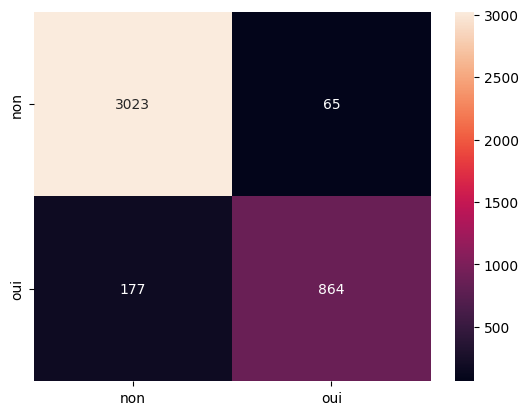

In [ ]:
#The train set
Y_p_train3 = model_rf.predict(X_train)
rf_accuracy = accuracy_score(Y_train, Y_p_train3)
rf_report = classification_report(Y_train, Y_p_train3)
print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:\n", rf_report)
sns.heatmap(confusion_matrix(Y_train,Y_p_train3), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])

Random Forest Classifier:
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

         non       0.80      0.84      0.82      1637
         oui       0.38      0.31      0.34       507

    accuracy                           0.72      2144
   macro avg       0.59      0.58      0.58      2144
weighted avg       0.70      0.72      0.71      2144



<Axes: >

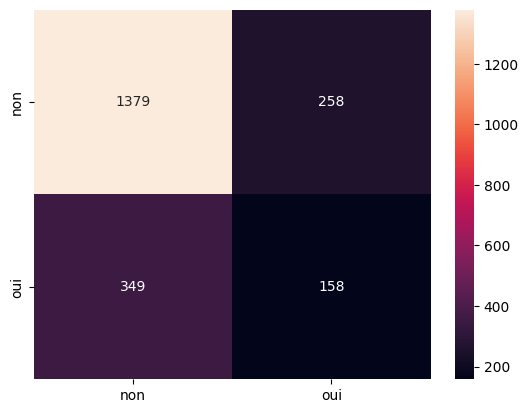

In [ ]:
#The train set
Y_p_test3 = model_rf.predict(X_test)
rf_accuracy = accuracy_score(Y_test, Y_p_test3)
rf_report = classification_report(Y_test, Y_p_test3)
print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:\n", rf_report)
sns.heatmap(confusion_matrix(Y_test,Y_p_test3), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}
C = [0.1, 1, 10, 100]
gamma = [0.1, 1, 10]
best_params ={

}
max_accuracy_score = 0
for c in C:
    for g in gamma:
        cls4 = SVC(kernel='rbf',class_weight='balanced',gamma=g, C=c)
        cls4.fit(X_train, Y_train)

        y_p_train=cls4.predict(X_train)
        c_m_train=confusion_matrix(Y_train, y_p_train)
        if(accuracy_score(Y_train,y_p_train) > max_accuracy_score):
            best_params['C'] = c
            best_params['gamma'] = g
            max_accuracy_score = accuracy_score(Y_train,y_p_train)
print("Meilleur paramètre de régularisation C :", best_params['C'])
print("Meilleur paramètre de noyau gamma :", best_params['gamma'])
print("Meilleur accuracy :", max_accuracy_score)

Meilleur paramètre de régularisation C : 1
Meilleur paramètre de noyau gamma : 10
Meilleur accuracy : 0.9413901671106806


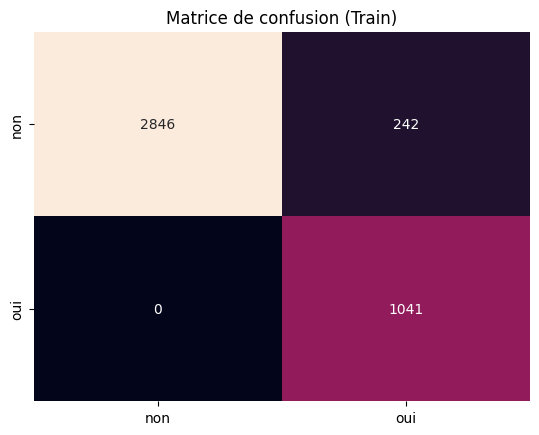

Accuracy: 0.941


In [ ]:
#SVC
cls4 = SVC(kernel='rbf',class_weight='balanced',gamma=best_params['gamma'], C=best_params['C'])
cls4.fit(X_train, Y_train)
# Validation sur les données d'entrainement
y_p_train = cls4.predict(X_train)
c_m_train = confusion_matrix(Y_train, y_p_train)

sns.heatmap(c_m_train, annot=True, cbar=False, xticklabels=cls4.classes_, yticklabels=cls4.classes_, fmt='d')
plt.title('Matrice de confusion (Train)')
plt.show()
print("Accuracy: {:.3f}".format(accuracy_score(Y_train,y_p_train)))

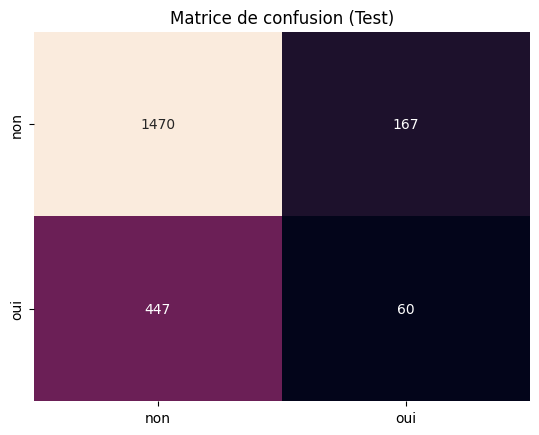

Accuracy: 0.714


In [ ]:
# Validation sur les données de test
y_p_test=cls4.predict(X_test)
c_m_test=confusion_matrix(Y_test, y_p_test)

sns.heatmap(c_m_test, annot=True, cbar=False, xticklabels=cls4.classes_, yticklabels=cls4.classes_, fmt='d')
plt.title('Matrice de confusion (Test)')
plt.show()
print("Accuracy: {:.3f}".format(accuracy_score(Y_test,y_p_test)))

In [ ]:
#SVC

svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, Y_train)

Meilleur paramètre de régularisation C : 100
Meilleur paramètre de noyau gamma : 10
Meilleur accuracy : 0.875946173254836



Support Vector Classifier (SVC):
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         non       0.76      0.98      0.86      3088
         oui       0.57      0.09      0.16      1041

    accuracy                           0.75      4129
   macro avg       0.67      0.54      0.51      4129
weighted avg       0.71      0.75      0.68      4129



<Axes: >

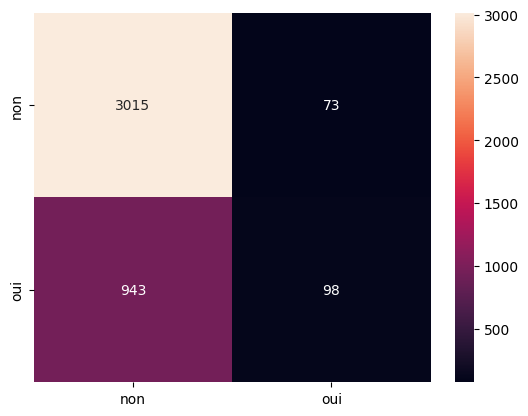

In [ ]:
#train set
svc_predictions1 = svc_model.predict(X_train)
svc_accuracy = accuracy_score(Y_train, svc_predictions1)
svc_report = classification_report(Y_train, svc_predictions1)
print("\nSupport Vector Classifier (SVC):")
print(f"Accuracy: {svc_accuracy:.2f}")
print("Classification Report:\n", svc_report)
sns.heatmap(confusion_matrix(Y_train,svc_predictions1), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])


Support Vector Classifier (SVC):
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

         non       0.78      0.98      0.87      1637
         oui       0.65      0.10      0.18       507

    accuracy                           0.77      2144
   macro avg       0.71      0.54      0.52      2144
weighted avg       0.75      0.77      0.71      2144



<Axes: >

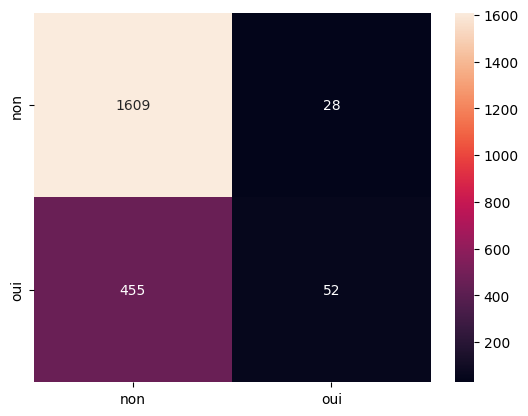

In [ ]:
#test set
svc_predictions2 = svc_model.predict(X_test)
svc_accuracy = accuracy_score(Y_test, svc_predictions2)
svc_report = classification_report(Y_test, svc_predictions2)
print("\nSupport Vector Classifier (SVC):")
print(f"Accuracy: {svc_accuracy:.2f}")
print("Classification Report:\n", svc_report)
sns.heatmap(confusion_matrix(Y_test,svc_predictions2), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])

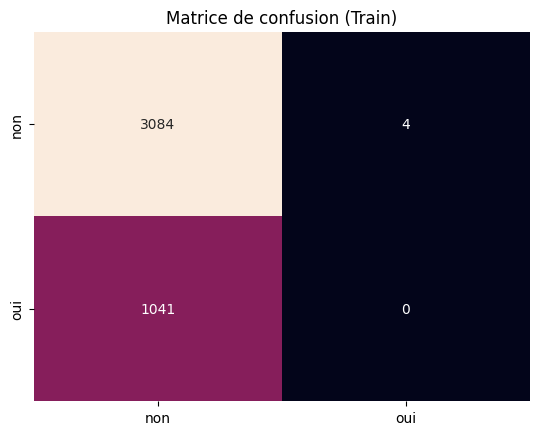

Accuracy: 0.747


In [ ]:
params = {
    'activation': 'tanh',
    'alpha': 0.0001,
    'early_stopping': False,
    'hidden_layer_sizes': (100,),
    'learning_rate': 'constant',
    'max_iter': 100,
    'solver': 'sgd'
}

cls5 = MLPClassifier(**params)

cls5.fit(X_train, Y_train)

y_p_train = cls5.predict(X_train)

c_m_train = confusion_matrix(Y_train, y_p_train)
sns.heatmap(c_m_train, annot=True, cbar=False, xticklabels=cls5.classes_, yticklabels=cls5.classes_, fmt='d')
plt.title('Matrice de confusion (Train)')
plt.show()

print("Accuracy: {:.3f}".format(accuracy_score(Y_train, y_p_train)))

In [ ]:
# Multi-layer Perceptron (MLP) Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, Y_train)

MLPClassifier(max_iter=1000, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Multi-layer Perceptron (MLP) Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         non       0.75      1.00      0.86      3088
         oui       0.00      0.00      0.00      1041

    accuracy                           0.75      4129
   macro avg       0.37      0.50      0.43      4129
weighted avg       0.56      0.75      0.64      4129



<Axes: >

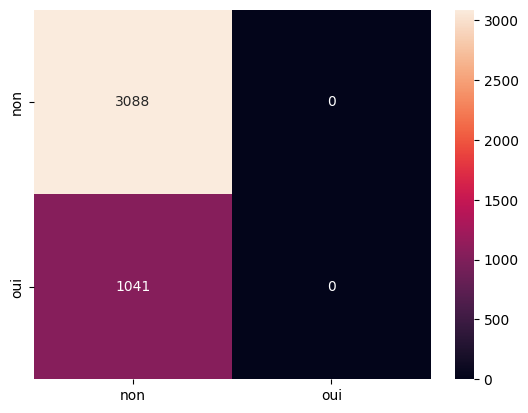

In [ ]:
#train set
mlp_predictions1 = mlp_model.predict(X_train)
mlp_accuracy = accuracy_score(Y_train, mlp_predictions1)
mlp_report = classification_report(Y_train, mlp_predictions1)
print("\nMulti-layer Perceptron (MLP) Classifier:")
print(f"Accuracy: {mlp_accuracy:.2f}")
print("Classification Report:\n", mlp_report)
sns.heatmap(confusion_matrix(Y_train,mlp_predictions1), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])


Multi-layer Perceptron (MLP) Classifier:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

         non       0.76      1.00      0.87      1637
         oui       0.00      0.00      0.00       507

    accuracy                           0.76      2144
   macro avg       0.38      0.50      0.43      2144
weighted avg       0.58      0.76      0.66      2144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

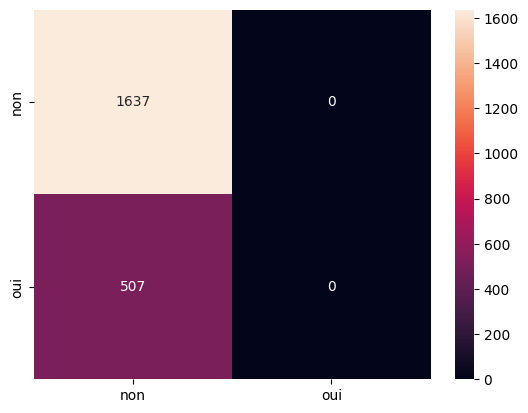

In [ ]:
#test set
mlp_predictions2 = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(Y_test, mlp_predictions2)
mlp_report = classification_report(Y_test, mlp_predictions2)
print("\nMulti-layer Perceptron (MLP) Classifier:")
print(f"Accuracy: {mlp_accuracy:.2f}")
print("Classification Report:\n", mlp_report)
sns.heatmap(confusion_matrix(Y_test,mlp_predictions2), annot=True, fmt="d",
xticklabels=['non','oui'], yticklabels=['non','oui'])